In [19]:
import numpy as np
from Fresnel_Holo import FullReconstruct
import cv2
import os   
import qrcode
import matplotlib.pyplot as plt

In [76]:
def generate_dataset(write_path_qr, write_path_holo, write_path_freconstr, n_samples_train, n_samples_val,
                     N = 96, box_size = 2,  ps = 5.5e-6, wavelength = 532e-9):

    registr_distantion = 6
    data_size = 6 # set max size of array for each version
    if not os.path.exists(write_path_qr):
        os.makedirs(write_path_qr + 'train/')
        os.makedirs(write_path_qr + 'val/')
        print('Создана новая директориия qr_seq')
    if not os.path.exists(write_path_holo):
        os.makedirs(write_path_holo + 'train/')
        os.makedirs(write_path_holo + 'val/')
        print('Создана новая директориия holo_seq')
    if not os.path.exists(write_path_freconstr):
        os.makedirs(write_path_freconstr + 'train/')
        os.makedirs(write_path_freconstr + 'val/')
        print('Создана новая директориия fren_seq')
    for n in range(n_samples_train):

        # data = np.random.randint(10, size = data_size) # qr 25*25 version 2
        data = np.random.randint(9, size = 21) #qr version 33*33 version 4
        qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = box_size, border = 2)
        qr.add_data(data)
        qr.make(fit = True)
        image = qr.make_image()
        image = 255*np.array(image, dtype=int)
        amplitude = np.sqrt(np.array(image))
        N = amplitude.shape[0] #размер объектного поля: (во все изображение, чтобы изображение было в углу и т.д.)
        z_0 = N * ps * ps / wavelength
        phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
        offset = 0
        object_field = np.zeros((N+offset, N+offset), dtype = complex)
        #object_field[N//2 - offset: N//2 + amplitude.shape[0] - offset , N//2 - offset: N//2 - offset + amplitude.shape[0]] = amplitude * np.exp(1j * phase)

        object_field[0 + offset: amplitude.shape[0]+ offset, 0+ offset: amplitude.shape[0]+ offset] = amplitude * np.exp(1j * phase)
        object_field = object_field / 2
        name = str(n) + '.png'
        object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= False)
        
        cv2.imwrite(write_path_qr + name, object_field)
        cv2.imwrite(write_path_holo + name, hologram)
        cv2.imwrite(write_path_freconstr + name, rec_image)
        # cv2.imwrite(write_path_qr + 'train/' + name, object_field)
        # cv2.imwrite(write_path_holo + 'train/' + name, hologram)
        # cv2.imwrite(write_path_freconstr + 'train/' + name, rec_image)
        
    # for n in range(n_samples_val):
    #     data = np.random.randint(10, size = data_size)
    #     qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = box_size, border = 0)
    #     qr.add_data(data)
    #     qr.make(fit = True)
    #     image = qr.make_image(fill_color = 'black', back_color = 'white')
    #     image = 255*np.array(image, dtype=int)
    #     amplitude = np.sqrt(np.array(image))
    #     phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
    #     object_field = np.zeros((N, N), dtype = complex)
    #     object_field[0: amplitude.shape[0], 0: amplitude.shape[0]] = amplitude * np.exp(1j * phase)
        
    #     name = str(n) + '.png'
    #     object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= False)
    #     cv2.imwrite(write_path_qr + 'val/' + name, object_field)
    #     cv2.imwrite(write_path_holo + 'val/' + name, hologram)
    #     cv2.imwrite(write_path_freconstr+ 'val/' + name, rec_image)
        

In [82]:
WRITEPATH_QR = 'E:/QR/experiments/inline_QR/QR_33/qr_seq/'
WRITEPATH_HOLO = 'E:/QR/experiments/inline_QR/QR_33/holo_seq/'
WRITEPATH_FREN = 'E:/QR/experiments/inline_QR/QR_33/fren_seq/'

In [83]:
n_samples_train = 10000
n_samples_val = 0

N = 33 #Размер объектного поля
box_size = 1 #Отсчетов картинки на один пиксель qr-кода
generate_dataset(WRITEPATH_QR, WRITEPATH_HOLO, WRITEPATH_FREN, n_samples_train, n_samples_val, N, box_size)


Создана новая директориия qr_seq
Создана новая директориия holo_seq
Создана новая директориия fren_seq


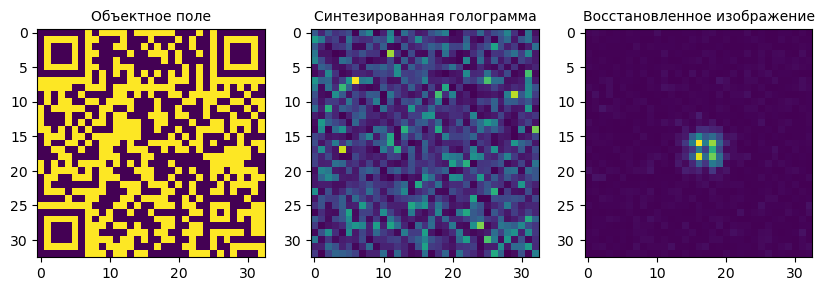

4
[0 4 3 0 1 6 0 6 6 8 3 8 6 4 7 3 3 4 0 4 5]
(33, 33)


In [75]:
# Ячейка для экспериментов
data = np.random.randint(9, size = 21)
#data = 9 * np.ones(21,dtype = int)
qr = qrcode.QRCode(error_correction = qrcode.constants.ERROR_CORRECT_H, box_size = 1, border = 0)
qr.add_data(data)
ps = 5.5e-6
wavelength = 532e-9

registr_distantion = 6
image = qr.make_image(fill_color = 'black', back_color = 'white')
qr.version
amplitude = np.array(image)
N = amplitude.shape[0]
# N = 128+16
z_0 = N * ps * ps / wavelength
phase = np.random.uniform(0, 2*np.pi, amplitude.shape)
object_field = np.zeros((N, N), dtype = complex)
object_field[0: amplitude.shape[0], 0: amplitude.shape[0]] = amplitude * np.exp(1j * phase)
object_field, hologram, rec_image = FullReconstruct(object_field, registr_distantion*z_0, plotting= True)
print(qr.version)
print(data)
print((object_field.shape))


In [25]:
N

25